# 280506 Kamil Tatrocki



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("data/players_22.csv", dtype={25: str, 108: str})

def position_group(pos):
    goalkeepers = ['GK']
    defenders = ['LB', 'RB', 'CB','LCB', 'RCB', 'LWB', 'RWB']
    midfielders = ['LM', 'RM', 'RCM', 'LCM', 'CM', 'CDM', 'LDM', 'RDM', 'CAM', 'LAM', 'RAM', 'LCM','RCM']
    attackers = ['ST', 'CF', 'LW', 'RW', 'LS', 'RS', 'RF', 'LF']

    if pos in defenders:
        return 'Obrońca'
    elif pos in midfielders:
        return 'Pomocnik'
    elif pos in attackers:
        return 'Napastnik'
    elif pos in goalkeepers:
        return 'bramkarz'
    else:
        return 'Inne'

data['pos_group'] = data['club_position'].apply(position_group)


In [2]:
numeric_stats = []
categorical_stats = []

for col in data.columns:
    missing_values = data[col].isna().sum()

    if pd.api.types.is_numeric_dtype(data[col]):
        col_mean = data[col].mean()
        col_median = data[col].median()
        col_min = data[col].min()
        col_max = data[col].max()
        col_std = data[col].std()
        col_5perc = data[col].quantile(0.05)
        col_95perc = data[col].quantile(0.95)

        numeric_stats.append({
            "column": col,
            "mean": col_mean,
            "median": col_median,
            "min": col_min,
            "max": col_max,
            "std": col_std,
            "5_percentile": col_5perc,
            "95_percentile": col_95perc,
            "missing_values": missing_values
        })

    else:
        unique_classes_count = data[col].nunique(dropna=True)
        value_counts = data[col].value_counts(dropna=True)


        total = value_counts.sum()
        class_proportions = (value_counts / total).to_dict() if total > 0 else {}

        categorical_stats.append({
            "column": col,
            "unique_classes_count": unique_classes_count,
            "missing_values": missing_values,
            "class_proportions": class_proportions
        })

numeric_stats_df = pd.DataFrame(numeric_stats)
categorical_stats_df = pd.DataFrame(categorical_stats)

numeric_stats_df.to_csv("numeric_stats.csv", index=False, sep=";")
categorical_stats_df.to_csv("categoricaal_stats.csv", index=False,  sep=";")

CZĘŚĆ NA 3.5

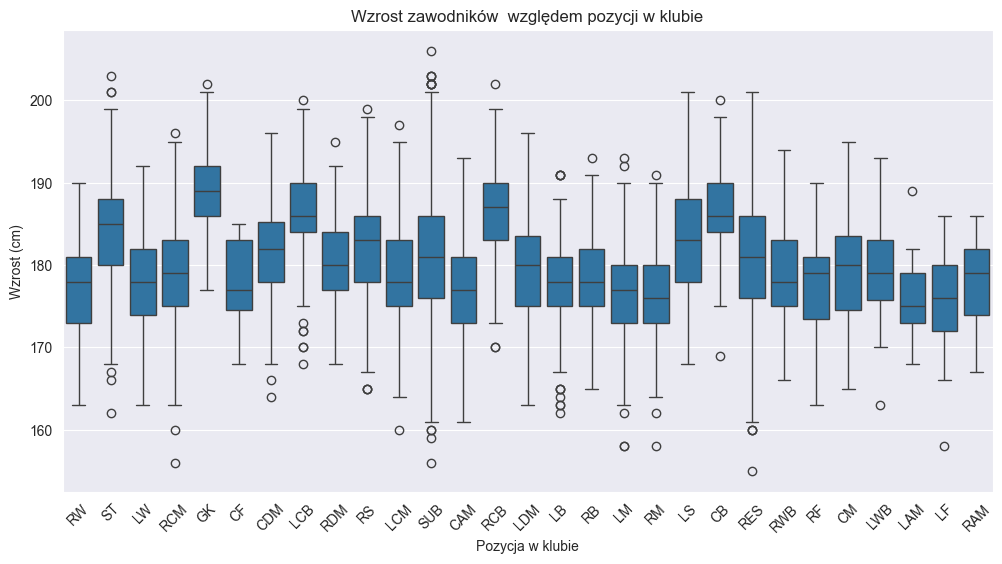

In [3]:



plt.figure(figsize=(12, 6))
sns.boxplot(x='club_position', y='height_cm', data=data)
plt.title("Wzrost zawodników  względem pozycji w klubie")
plt.xlabel("Pozycja w klubie")
plt.ylabel("Wzrost (cm)")
plt.xticks(rotation=45)
plt.show()


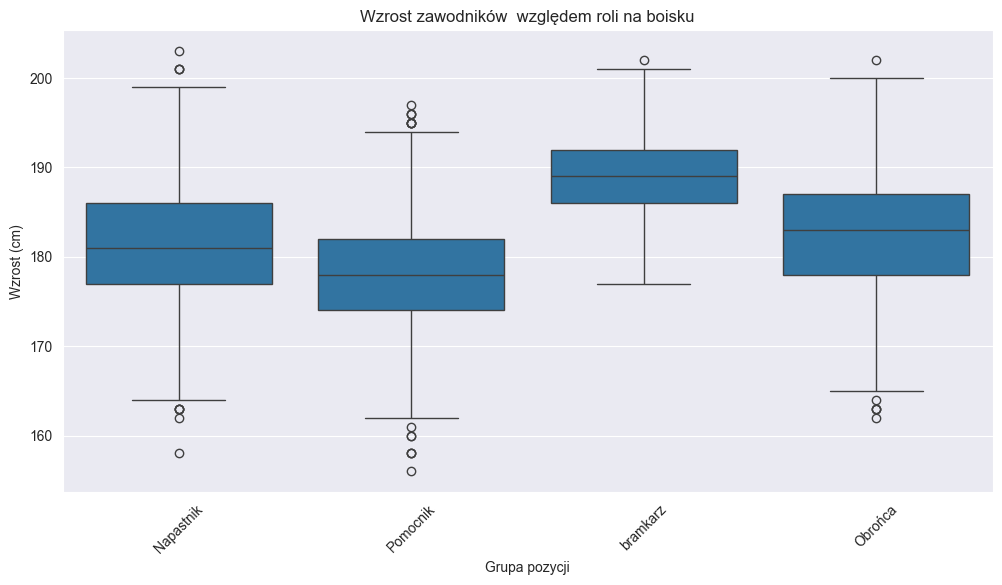

In [4]:


filtered_data = data[data['pos_group'] != 'Inne']
plt.figure(figsize=(12, 6))
sns.boxplot(x='pos_group', y='height_cm', data=filtered_data)
plt.title("Wzrost zawodników  względem roli na boisku")
plt.xlabel("Grupa pozycji")
plt.ylabel("Wzrost (cm)")
plt.xticks(rotation=45)
plt.show()


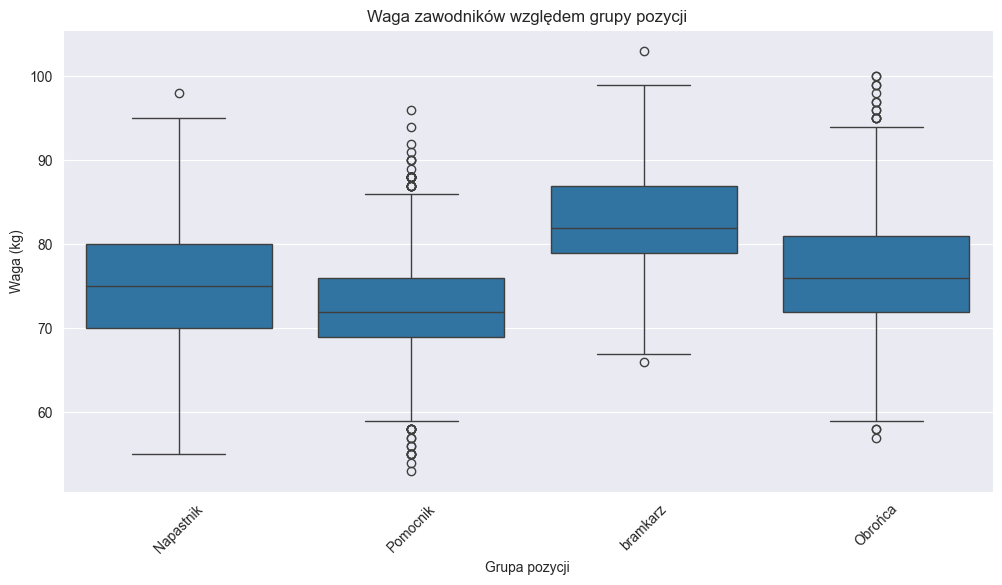

In [5]:
filtered_data = data[data['pos_group'] != 'Inne']

plt.figure(figsize=(12, 6))
sns.boxplot(x='pos_group', y='weight_kg', data=filtered_data)
plt.title("Waga zawodników względem grupy pozycji")
plt.xlabel("Grupa pozycji")
plt.ylabel("Waga (kg)")
plt.xticks(rotation=45)
plt.show()

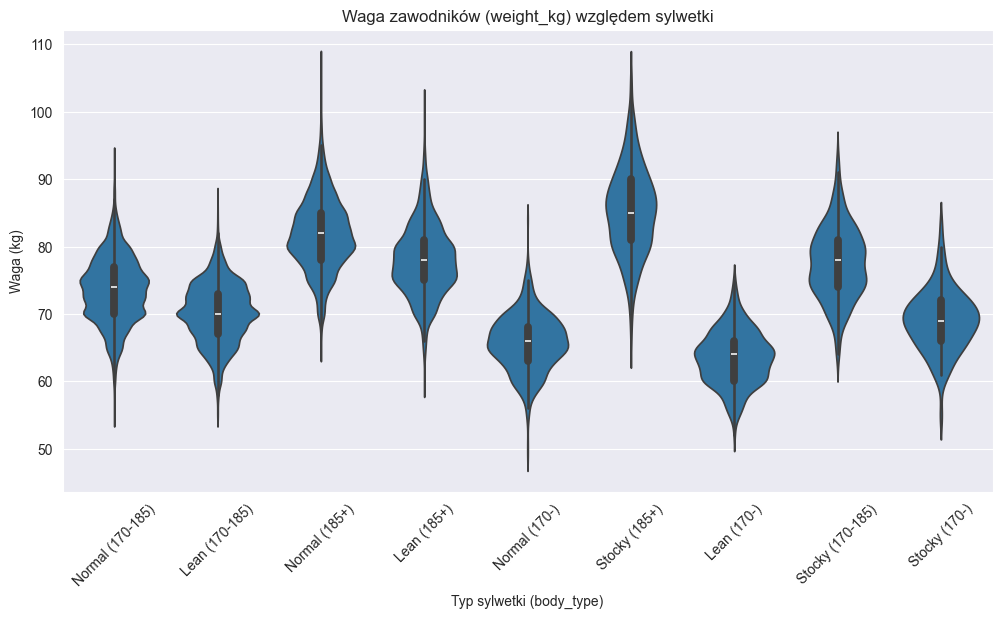

In [6]:
filtered_data = data[data['body_type'] != 'Unique']
plt.figure(figsize=(12, 6))

sns.violinplot(x='body_type', y='weight_kg', data=filtered_data)
plt.title("Waga zawodników (weight_kg) względem sylwetki")
plt.xlabel("Typ sylwetki (body_type)")
plt.ylabel("Waga (kg)")
plt.xticks(rotation=45)
plt.show()

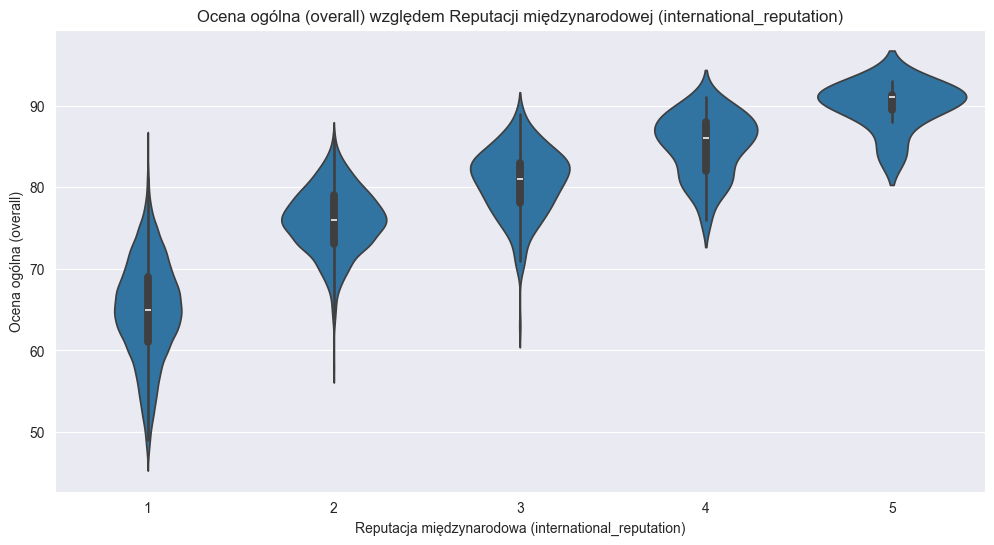

In [7]:
filtered_reputation_overall = data.dropna(subset=['international_reputation', 'overall'])
plt.figure(figsize=(12, 6))
sns.violinplot(x='international_reputation', y='overall', data=filtered_reputation_overall)
plt.title("Ocena ogólna (overall) względem Reputacji międzynarodowej (international_reputation)")
plt.xlabel("Reputacja międzynarodowa (international_reputation)")
plt.ylabel("Ocena ogólna (overall)")

plt.show()


WYMAGANIA NA 4 (bar ploty to do)

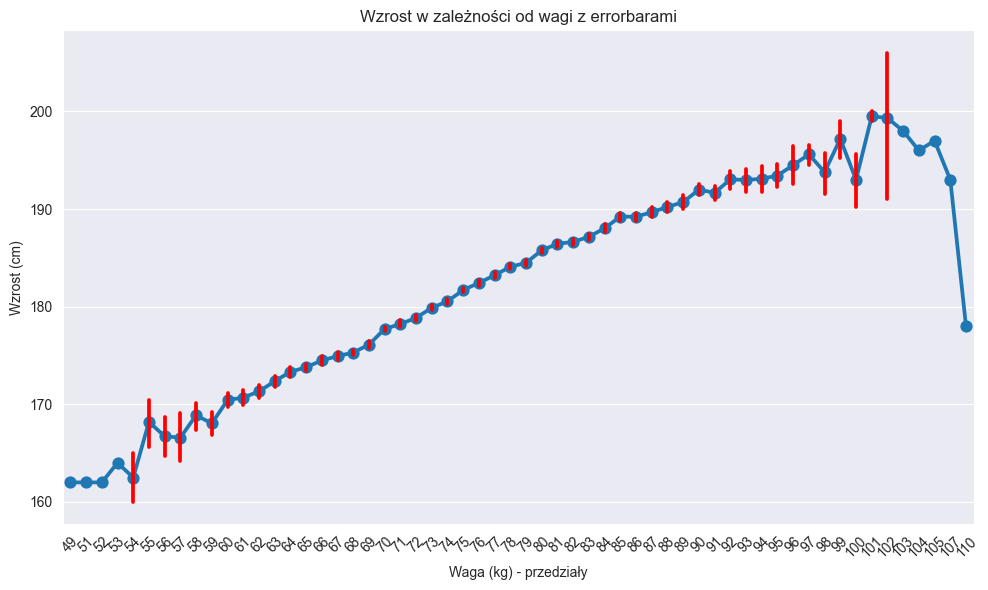

In [8]:



plt.figure(figsize=(10, 6))

sns.pointplot(x='weight_kg', y='height_cm', data=data, errorbar=('ci', 95), err_kws={'color': 'red'})

plt.xlabel("Waga (kg) - przedziały")
plt.ylabel("Wzrost (cm)")
plt.title("Wzrost w zależności od wagi z errorbarami")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


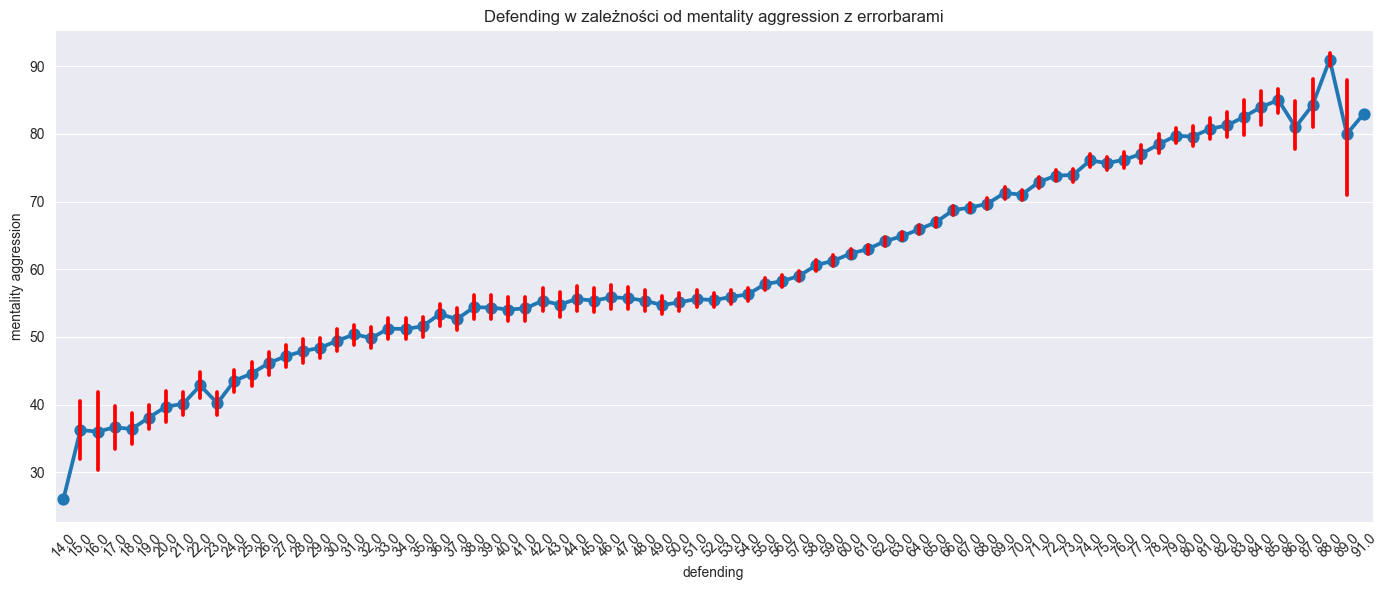

In [9]:
plt.figure(figsize=(14, 6))

sns.pointplot(x='defending', y='mentality_aggression', data=data, errorbar=('ci', 95), err_kws={'color': 'red'})

plt.xlabel("defending")
plt.ylabel("mentality aggression")
plt.title("Defending w zależności od mentality aggression z errorbarami")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

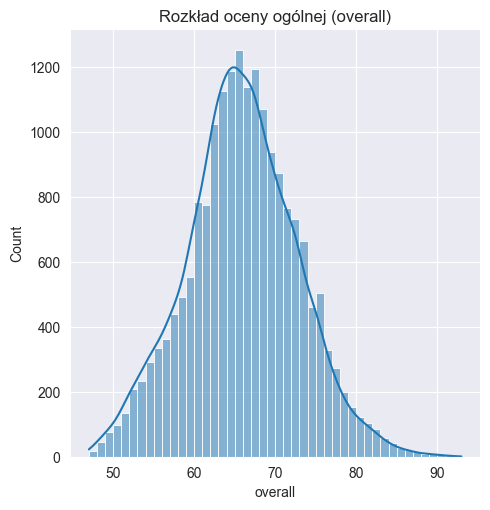

In [10]:

sns.displot(data=data, x='overall', binwidth=1, kde=True)
plt.title("Rozkład oceny ogólnej (overall)")
plt.show()

<Figure size 1000x1200 with 0 Axes>

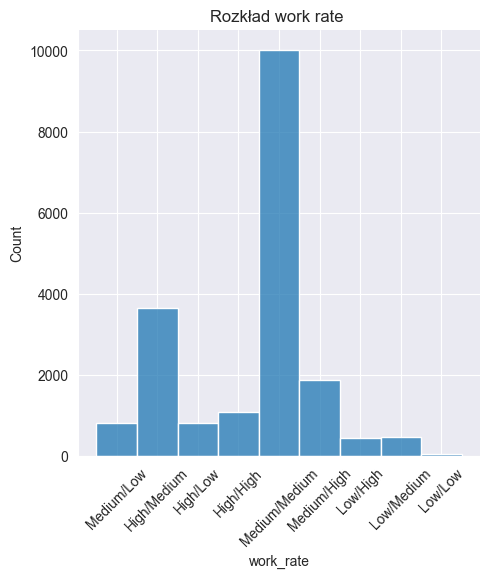

In [11]:
plt.figure(figsize=(10, 12))
sns.displot(data=data, x='work_rate', binwidth=1, )
plt.title("Rozkład work rate ")
plt.xticks(rotation=45)
plt.show()


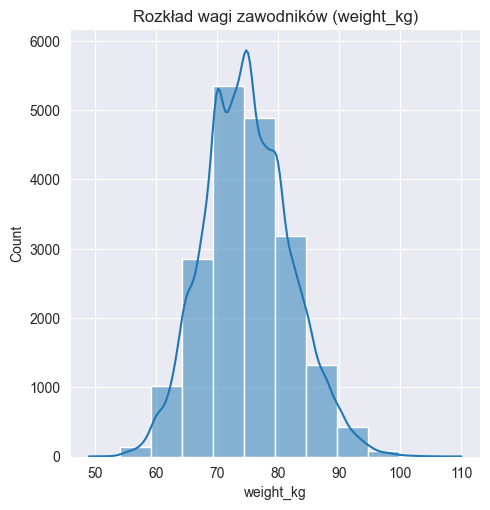

In [12]:
sns.displot(data=data, x='weight_kg', binwidth=5, kde=True)
plt.title("Rozkład wagi zawodników (weight_kg)")
plt.show()


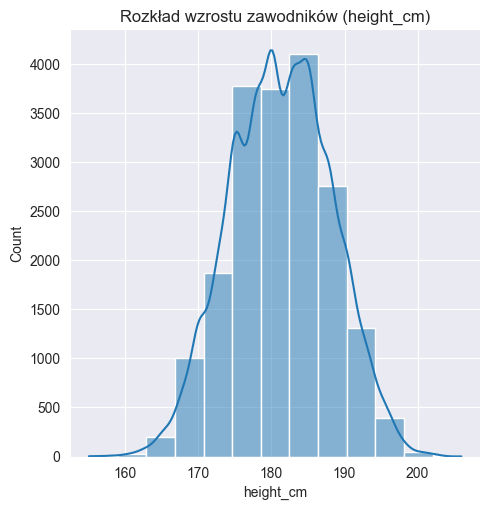

In [13]:
sns.displot(data=data, x='height_cm', binwidth=4, kde=True)
plt.title("Rozkład wzrostu zawodników (height_cm)")
plt.show()


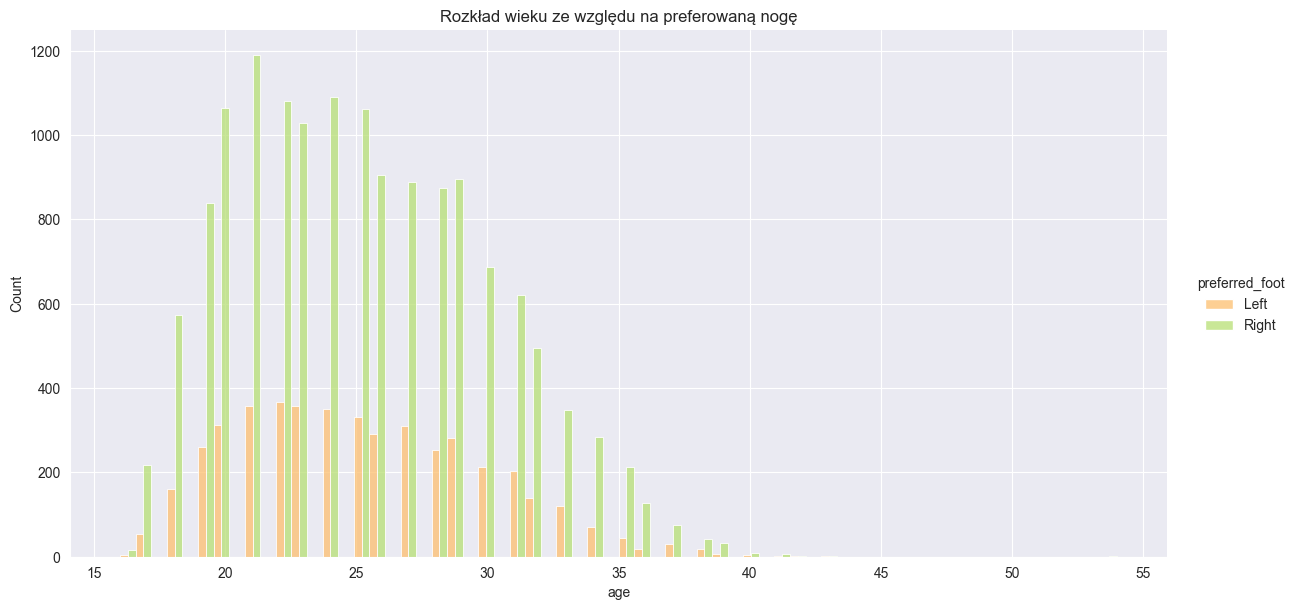

In [14]:

sns.displot(data=data, x="age", hue="preferred_foot", multiple="dodge", shrink=1, palette="RdYlGn", height=6, aspect=2)
plt.title("Rozkład wieku ze względu na preferowaną nogę")
plt.show()


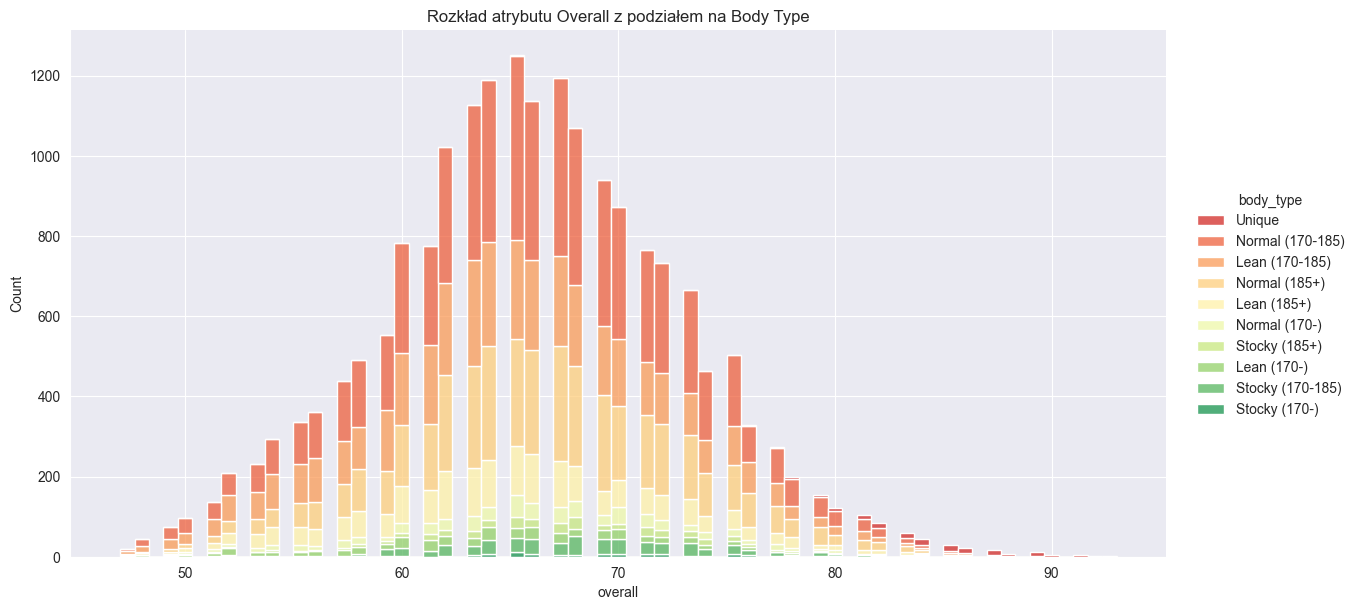

In [15]:
sns.displot(data=data, x="overall", hue="body_type", multiple="stack", shrink=1, palette="RdYlGn", height=6, aspect=2)
plt.title("Rozkład atrybutu Overall z podziałem na Body Type")
plt.show()

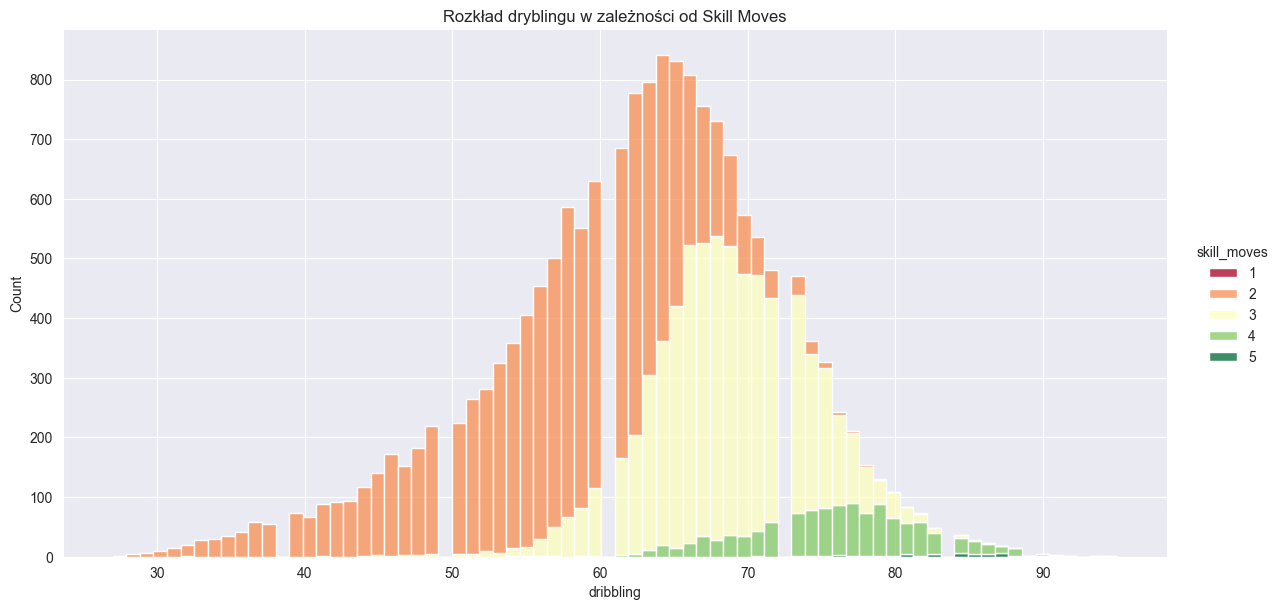

In [16]:
sns.displot(data=data, x="dribbling", hue="skill_moves", multiple="stack", shrink=1, palette="RdYlGn", height=6, aspect=2)
plt.title("Rozkład dryblingu w zależności od Skill Moves")
plt.show()


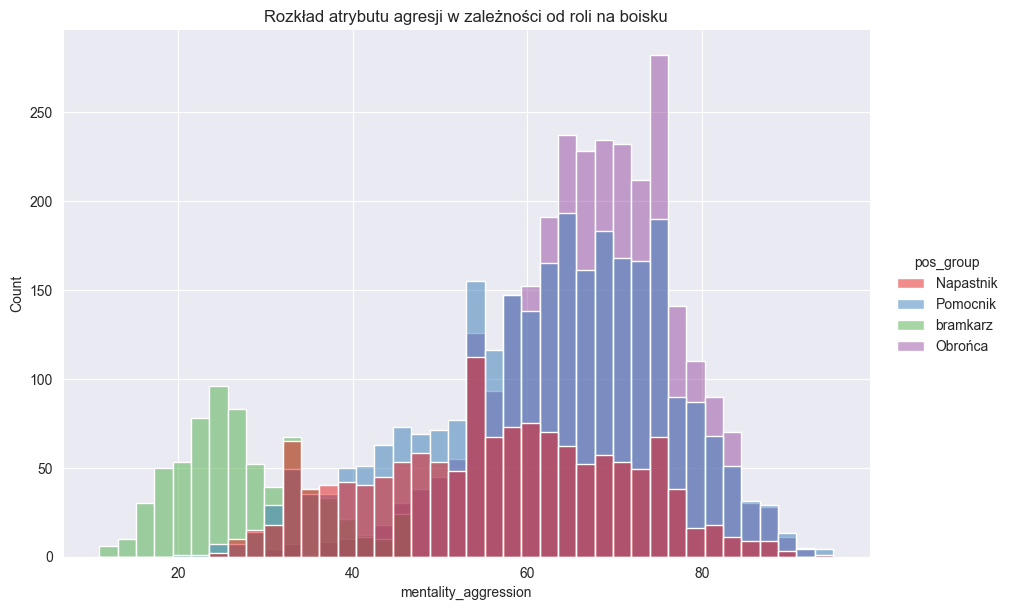

In [17]:
filtered_data = data[data['pos_group'] != 'Inne']
sns.displot(data=filtered_data, x="mentality_aggression", hue="pos_group",  shrink=1, palette="Set1", height=6, aspect=1.5)
plt.title("Rozkład atrybutu agresji w zależności od roli na boisku")
plt.show()

WYMAGANIA NA 4.5

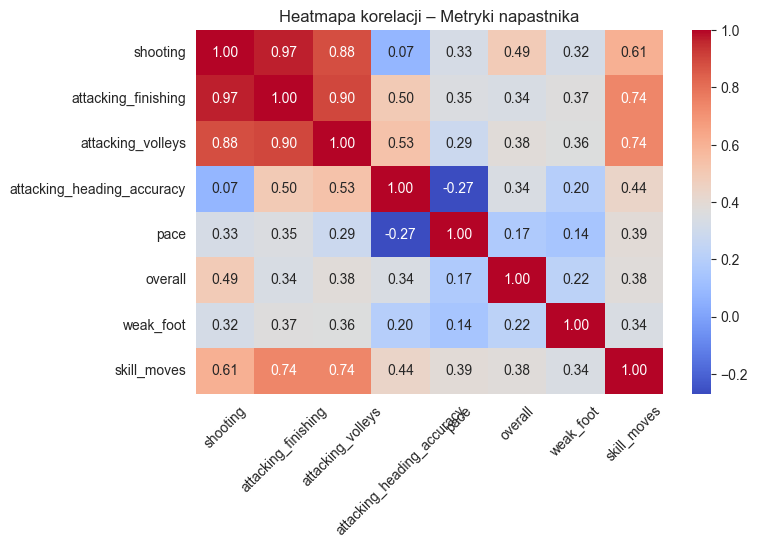

In [18]:
cols = ["shooting", "attacking_finishing", "attacking_volleys", "attacking_heading_accuracy", "pace", "overall", "weak_foot", "skill_moves"]
datafromcol = data[cols].apply(pd.to_numeric)
corr_matrix = datafromcol.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmapa korelacji – Metryki napastnika")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

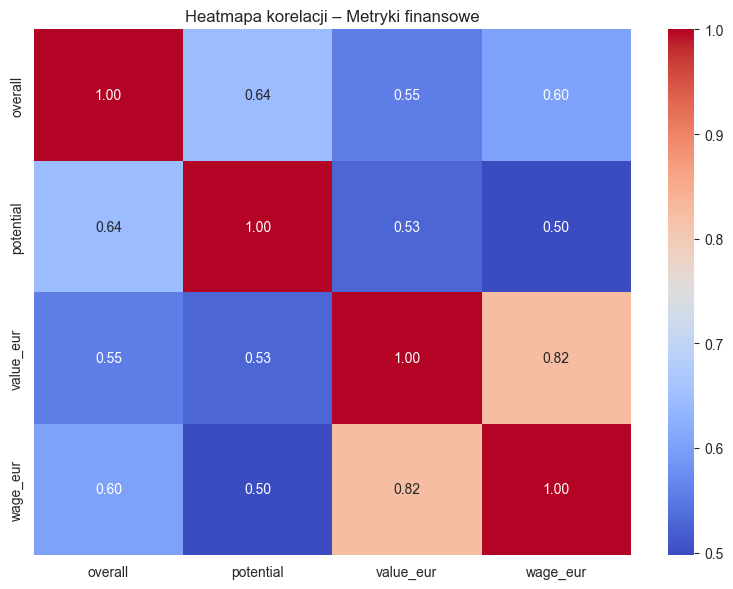

In [19]:
cols = ["overall", "potential", "value_eur", "wage_eur"]
datafromcol = data[cols].apply(pd.to_numeric)
corr_matrix = datafromcol.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmapa korelacji – Metryki finansowe")
plt.tight_layout()
plt.show()

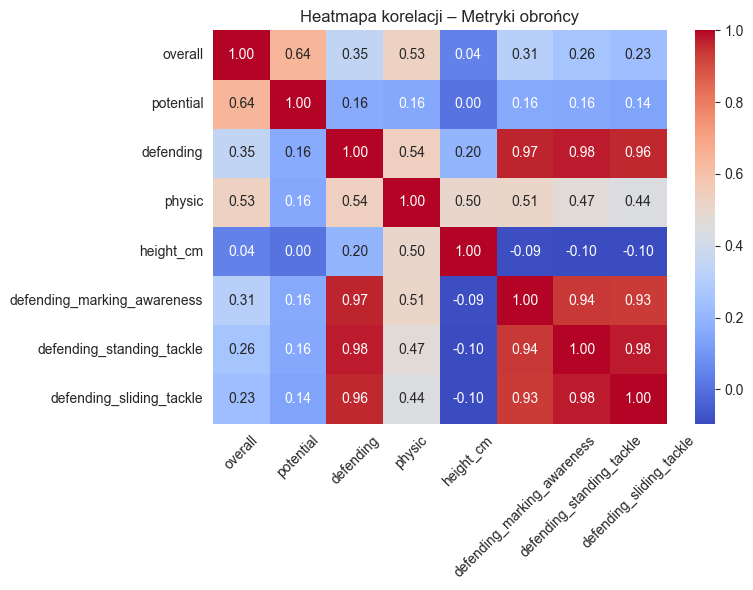

In [20]:
cols = ["overall", "potential", "defending", "physic", "height_cm","defending_marking_awareness","defending_standing_tackle", "defending_sliding_tackle" ]
datafromcol = data[cols].apply(pd.to_numeric)
corr_matrix = datafromcol.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmapa korelacji – Metryki obrońcy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()